In [1]:
import numpy as np
import pandas as pd

In [53]:
nasah_pulse_tkr = pd.read_csv("nyu_max_tkr.csv",sep =";")
nasah_pulse_tkr.columns = ['detik','millis','r','ir','bpm','avg_bpm']
nasah_pulse_tkr

,detik,millis,r,ir,bpm,avg_bpm
0,0,75.0,33024.0,97295.0,0.00,0.0
1,0,115.0,33031.0,97304.0,0.00,0.0
2,0,155.0,33039.0,97306.0,0.00,0.0
3,0,195.0,33049.0,97310.0,0.00,0.0
4,0,235.0,33061.0,97319.0,0.00,0.0
...,...,...,...,...,...,...
5006,200,200471.0,31709.0,92536.0,74.91,62.0
5007,200,200511.0,31721.0,92552.0,74.91,62.0
5008,200,200551.0,31735.0,92553.0,74.91,62.0
5009,200,200592.0,31737.0,92570.0,74.91,62.0


<Axes: >

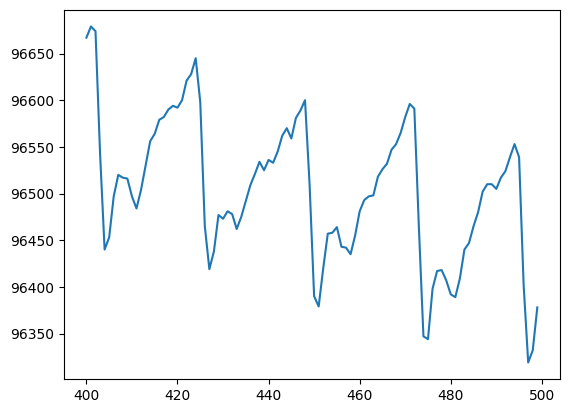

In [76]:
nasah_pulse_tkr['ir'][400:500].plot()


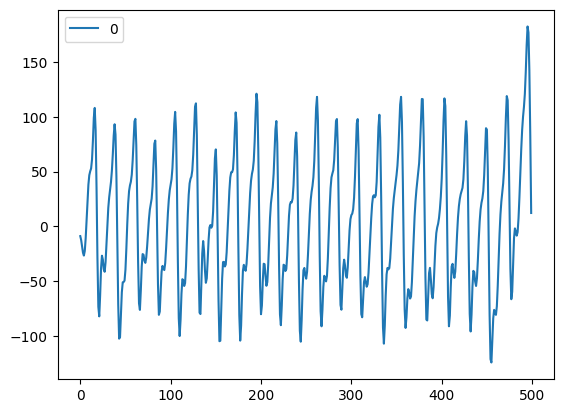

In [91]:
import neurokit2 as nk
nasah = nk.ppg_clean(nasah_pulse_tkr['ir'][500:1000], sampling_rate=50, method='elgendi');
pd.DataFrame(nasah).plot();

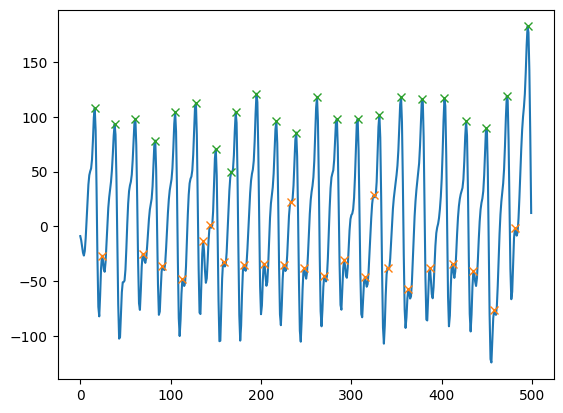

In [92]:

med = nasah.max()*0.20
med


def diastol(signal, median=med):

  peaks = []
  for i in range(1, len(signal) - 1):
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1] and signal[i] < median:
      peaks.append(i)

  return peaks

def sistol(signal, median=med):

  peaks = []
  for i in range(1, len(signal) - 1):
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1] and signal[i] > median:
      peaks.append(i)

  return peaks


# signal = np.sin(2 * np.pi * 5 * np.linspace(0, 1, 1000))
# signal = np.sin(2 * np.pi * 5 * np.linspace(0, 1, 1000)) + np.sin(2 * np.pi * 10 * np.linspace(0, 1, 1000))

peaks_diastol = diastol(nasah)
peaks_sistol = sistol(nasah)


import matplotlib.pyplot as plt
plt.plot(nasah);
plt.plot(peaks_diastol, nasah[peaks_diastol], "x");
plt.plot(peaks_sistol, nasah[peaks_sistol], "x");
